# بسم الله الرحمن الرحيم

In [134]:
from utils import *
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt 


In [135]:
df = pd.read_csv("dataset/body_level_classification_train.csv")

In [136]:
df_original= cleaning_data(df).copy()

In [137]:
all_class_train,all_class_test=data_spliting(df_original,1/3)
## shuffling 
all_class_train = all_class_train.sample(frac=1.0, random_state=42)
all_class_test = all_class_test.sample(frac=1.0, random_state=42)

In [138]:
X_train=all_class_train.drop(["Body_Level"],axis=1).to_numpy()
Y_train=all_class_train["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()

In [139]:
class_weights = all_class_train["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}

In [140]:
X_train, scaler= data_scaling(X_train)


In [141]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)

In [142]:
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

# Bare Logistic Regression 

In [143]:
bare_reg_model = LogisticRegression()
# concat the train and the val becuase it's the bare one 
bare_reg_model.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

LogisticRegression()

## accuracy on test

In [144]:
bare_accuracy , repo = test_model(bare_reg_model,X_train,Y_train,axis=False)
print(bare_accuracy)
print(repo)

0.9533468559837728
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       127
           1       0.94      0.74      0.83       134
           2       0.91      0.97      0.94       271
           3       1.00      0.99      0.99       454

    accuracy                           0.95       986
   macro avg       0.94      0.93      0.93       986
weighted avg       0.95      0.95      0.95       986



In [145]:
bare_accuracy , repo = test_model(bare_reg_model,X_test,Y_test,axis=False)

In [146]:
print(bare_accuracy)

0.9512195121951219


In [147]:
print(repo)

              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.96      0.72      0.83        36
           2       0.93      0.99      0.96        80
           3       0.99      1.00      1.00       102

    accuracy                           0.95       246
   macro avg       0.94      0.92      0.92       246
weighted avg       0.95      0.95      0.95       246



## Regression model with class weights only 


In [148]:
only_weights_model = LogisticRegression(random_state=42,max_iter=3000
                                        ,class_weight=class_weights)



In [149]:
only_weights_model.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))


LogisticRegression(class_weight={0: 1.9409448818897639, 1: 1.8395522388059702,
                                 2: 0.9095940959409594, 3: 0.5429515418502202},
                   max_iter=3000, random_state=42)

In [150]:
only_weights_accuracy , repo = test_model(only_weights_model,X_test,Y_test,axis=False)


In [151]:
only_weights_accuracy , repo= test_model(only_weights_model,X_train,Y_train,axis=False)

In [152]:
print(only_weights_accuracy)
print(repo)

0.960446247464503
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       127
           1       0.91      0.87      0.89       134
           2       0.95      0.95      0.95       271
           3       1.00      0.98      0.99       454

    accuracy                           0.96       986
   macro avg       0.94      0.95      0.95       986
weighted avg       0.96      0.96      0.96       986



## applying the hyperpamater tuning 
**In this model we get the best we can get from the Logistic regression by applying the Tuning and get the best hyperparameters**

In [153]:

reg_model = LogisticRegression(random_state=42,max_iter=3000)
# Define the parameter grid to search over
param_grid = {
    'C': [0.001,0.01,0.1, 1, 10,100,200,300,400,500 ,600 ,700 ],
    'penalty': ['l2']
}


grid_search = GridSearchCV(estimator=reg_model, param_grid=param_grid,
                           cv=2,verbose=2)

# concat beacuase we use the K-Fold cross validation 
grid_search.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))



# Access the cv_results_ dictionary
cv_results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(params['C'], mean_score)



Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END .................................C=0.01, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ...................................C=10, penalty=l2; total time=   0.1s
[CV] END ...................................C=10, penalty=l2; total time=   0.1s
[CV] END ..................................C=100, penalty=l2; total time=   0.1s
[CV] END ..................................C=100

In [15]:
best_reg_model = grid_search.best_estimator_

In [155]:
from sklearn.metrics import mean_squared_error
y_train_pred = best_reg_model.predict(X_train)
training_error = mean_squared_error(Y_train, y_train_pred)

In [157]:
cv_results = grid_search.cv_results_
validation_scores = cv_results['mean_test_score']

In [172]:
val_error=[]
print("Training Error:", training_error)
for fold, score in enumerate(validation_scores):
    print("Validation Score (Fold {}):".format(fold+1), score)
    val_error.append(1-score)

Training Error: 0.0010141987829614604
Validation Score (Fold 1): 0.49878576707845
Validation Score (Fold 2): 0.6702077394150565
Validation Score (Fold 3): 0.8334798331749551
Validation Score (Fold 4): 0.8984558124802027
Validation Score (Fold 5): 0.946377098511245
Validation Score (Fold 6): 0.9642500791891035
Validation Score (Fold 7): 0.9650630873191849
Validation Score (Fold 8): 0.9675007918910358
Validation Score (Fold 9): 0.9675007918910358
Validation Score (Fold 10): 0.9683138000211171
Validation Score (Fold 11): 0.9691254883328054
Validation Score (Fold 12): 0.9691268081511983


In [175]:
C_values = [0.001,0.01,0.1, 1, 10,100,200,300,400,500 ,600 ,700]
train_error = []

for c in C_values: 
    sample_reg=LogisticRegression(C=c,max_iter=2000)
    sample_reg.fit(X_train,Y_train)
    y_train_pred = sample_reg.predict(X_train)
    training_error = mean_squared_error(Y_train, y_train_pred)
    train_error.append(training_error)

## accuracy on test on best reg model 

In [176]:
best_accuracy , repo = test_model(best_reg_model,X_test,Y_test,axis=False)

In [177]:
print(best_accuracy)
print(repo)

0.983739837398374
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        36
           2       1.00      0.97      0.99        80
           3       0.98      1.00      0.99       102

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



## Plotting the change on accuracy tuning the 'C' hyperparameter

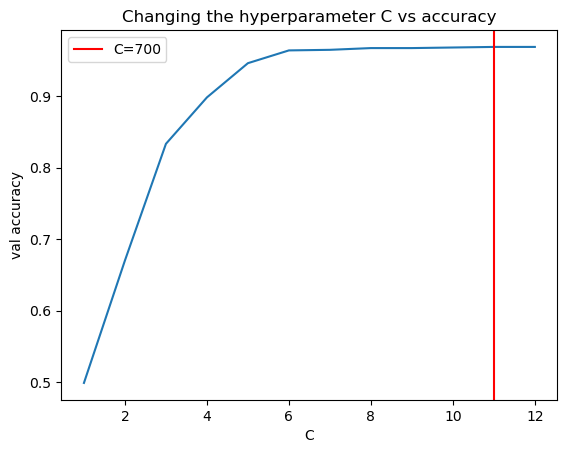

In [178]:
# Print the mean test scores for each hyperparameter combination
x_axis = []
y_axis = []
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    x_axis.append(params["C"])
    y_axis.append(mean_score)
    
    
plt.plot(np.arange(1,len(x_axis)+1),y_axis)
plt.title('Changing the hyperparameter C vs accuracy')
plt.xlabel('C')
plt.ylabel('val accuracy')
plt.axvline(np.argmax(cv_results["mean_test_score"]),
            color='red',
            label=f"C={cv_results['params'][np.argmax(cv_results['mean_test_score'])]['C']}")
plt.legend()
plt.show()

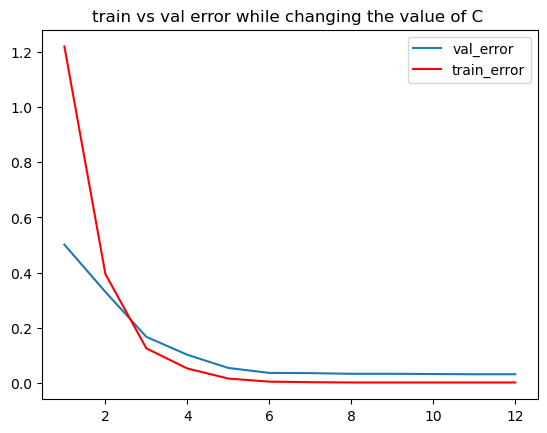

In [186]:
plt.plot(np.arange(1,len(x_axis)+1),val_error,label='val_error')
plt.plot(np.arange(1,len(x_axis)+1),train_error,label='train_error',color='red')
plt.title("train vs val error while changing the value of C ")
plt.legend()
plt.show()

## Regression model with best C only


In [187]:
only_C_model = LogisticRegression(random_state=42,max_iter=3000
                                        ,C=700)


In [188]:
only_C_model.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

LogisticRegression(C=700, max_iter=3000, random_state=42)

In [189]:
only_C_accuracy , repo = test_model(only_C_model,X_test,Y_test,axis=False)

In [190]:
print(only_C_accuracy)
print(repo)

0.983739837398374
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        36
           2       1.00      0.97      0.99        80
           3       0.98      1.00      0.99       102

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



**As shown from above analysis , it's obvious that the Tuning the Parameter C alone , or providing class_weights alone is much better that apply both of them**

# oversampling 

In [191]:
oversampled= over_sampling(all_class_train,sampling_ratio=0.5)

In [192]:
class_weights = oversampled["Body_Level"].value_counts().to_dict()
total_num = sum(class_weights.values())
class_weights= { i : (total_num/(4* j )) for i ,j in zip(class_weights.keys(),class_weights.values())}

In [193]:
class_weights

{3: 0.7252202643171806,
 2: 0.9571220930232558,
 1: 1.256679389312977,
 0: 1.2811284046692606}

In [194]:
X_train=oversampled.drop(["Body_Level"],axis=1).to_numpy()
Y_train=oversampled["Body_Level"].to_numpy()
X_test =all_class_test.drop(["Body_Level"],axis=1).to_numpy()
Y_test =all_class_test["Body_Level"].to_numpy()

In [195]:
X_train, scaler= data_scaling(X_train)
X_val, X_test, Y_val, Y_test = train_test_split(X_test
                                                     , Y_test, test_size=0.5, random_state=42)
X_val = scaler.transform(X_val)
X_test=scaler.transform(X_test)

## Applying the bare Regression on Oversampled data 

In [196]:
bare_oversampled_reg = LogisticRegression(max_iter=1000)
bare_oversampled_reg.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

LogisticRegression(max_iter=1000)

In [197]:
bare_oversampled_accuracy , repo = test_model(bare_oversampled_reg,X_test,Y_test,axis=False)

In [198]:
bare_oversampled_accuracy , repo = test_model(bare_oversampled_reg,X_train,Y_train,axis=False)

In [199]:
print(bare_oversampled_accuracy)
print(repo)

0.9552012148823082
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       257
           1       0.96      0.84      0.90       262
           2       0.94      0.96      0.95       344
           3       0.99      0.99      0.99       454

    accuracy                           0.96      1317
   macro avg       0.95      0.95      0.95      1317
weighted avg       0.96      0.96      0.95      1317



## Applying Regression On Over sampled data Class_weights only

In [200]:
oversampled_class_weights = LogisticRegression(max_iter=1000,class_weight=class_weights)
oversampled_class_weights.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

LogisticRegression(class_weight={0: 1.2811284046692606, 1: 1.256679389312977,
                                 2: 0.9571220930232558, 3: 0.7252202643171806},
                   max_iter=1000)

In [201]:
oversampled_class_weights_accuracy , repo = test_model(oversampled_class_weights,X_test,
                                                       Y_test,axis=False)

In [202]:
oversampled_class_weights_accuracy , repo = test_model(oversampled_class_weights,X_train,
                                                       Y_train,axis=False)

In [203]:
print(oversampled_class_weights_accuracy)
print(repo)

0.9597570235383447
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       257
           1       0.95      0.88      0.91       262
           2       0.96      0.95      0.95       344
           3       0.99      0.99      0.99       454

    accuracy                           0.96      1317
   macro avg       0.95      0.96      0.95      1317
weighted avg       0.96      0.96      0.96      1317



## Tuning the C value on oversampled data  

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score



reg_model = LogisticRegression(random_state=42,max_iter=3000)
# Define the parameter grid to search over
param_grid = {
    'C': [0.001,0.01,0.1, 1, 10,100,200,300,400,500 ,600 ,700,800,900,1000],
    'penalty': ['l2']
}


grid_search = GridSearchCV(estimator=reg_model, param_grid=param_grid, cv=5 , verbose=1 )

grid_search.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))



# Access the cv_results_ dictionary
cv_results = grid_search.cv_results_

# Print the mean test scores for each hyperparameter combination
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(params, mean_score)



Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 0.001, 'penalty': 'l2'} 0.5659457688211681
{'C': 0.01, 'penalty': 'l2'} 0.7182948308347669
{'C': 0.1, 'penalty': 'l2'} 0.8655505038092898
{'C': 1, 'penalty': 'l2'} 0.9391701482755795
{'C': 10, 'penalty': 'l2'} 0.9705353485704924
{'C': 100, 'penalty': 'l2'} 0.9807815188006881
{'C': 200, 'penalty': 'l2'} 0.9820635700827394
{'C': 300, 'penalty': 'l2'} 0.9833435733595477
{'C': 400, 'penalty': 'l2'} 0.9839845990005734
{'C': 500, 'penalty': 'l2'} 0.9839845990005734
{'C': 600, 'penalty': 'l2'} 0.984625624641599
{'C': 700, 'penalty': 'l2'} 0.984625624641599
{'C': 800, 'penalty': 'l2'} 0.984625624641599
{'C': 900, 'penalty': 'l2'} 0.9839866470058164
{'C': 1000, 'penalty': 'l2'} 0.9839866470058164


In [205]:
Oversampled_C_only_accuracy , repo = test_model(grid_search.best_estimator_,
                                                X_test,Y_test,axis=False)

In [206]:
print(Oversampled_C_only_accuracy)
print(repo)

0.983739837398374
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        36
           2       1.00      0.97      0.99        80
           3       0.98      1.00      0.99       102

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



## Plot the different values of C 

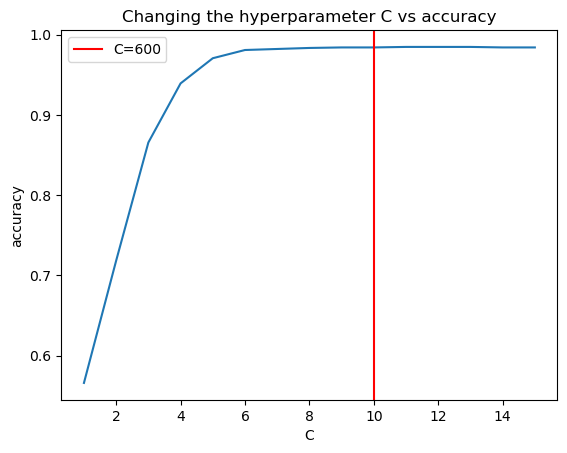

In [207]:
x_axis = []
y_axis = []
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    x_axis.append(params["C"])
    y_axis.append(mean_score)
    
    
plt.plot(np.arange(1,len(x_axis)+1),y_axis)
plt.title('Changing the hyperparameter C vs accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.axvline(np.argmax(cv_results["mean_test_score"]),
            color='red',
            label=f"C={cv_results['params'][np.argmax(cv_results['mean_test_score'])]['C']}")
plt.legend()
plt.show()

## Logistic Regression on best C and class weights on Oversampled data

In [208]:
best_oversampled_class_weights = LogisticRegression(max_iter=1000,class_weight=class_weights,C=600)
best_oversampled_class_weights.fit(np.concatenate([X_train,X_val], axis=0)
                   ,np.concatenate([Y_train,Y_val],axis=0))

LogisticRegression(C=600,
                   class_weight={0: 1.2811284046692606, 1: 1.256679389312977,
                                 2: 0.9571220930232558, 3: 0.7252202643171806},
                   max_iter=1000)

In [209]:
best_oversampled_class_weights_accuracy , repo = test_model(best_oversampled_class_weights,
                                                            X_test,Y_test,axis=False)

In [210]:
print(best_oversampled_class_weights_accuracy)
print(repo)

0.9878048780487805
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.99        36
           2       1.00      0.97      0.99        80
           3       0.98      1.00      0.99       102

    accuracy                           0.99       246
   macro avg       0.99      0.99      0.99       246
weighted avg       0.99      0.99      0.99       246



In [211]:
with open("Best_Logistic_Regression_Model.h5","wb") as fb: 
            pickle.dump(best_oversampled_class_weights,fb)

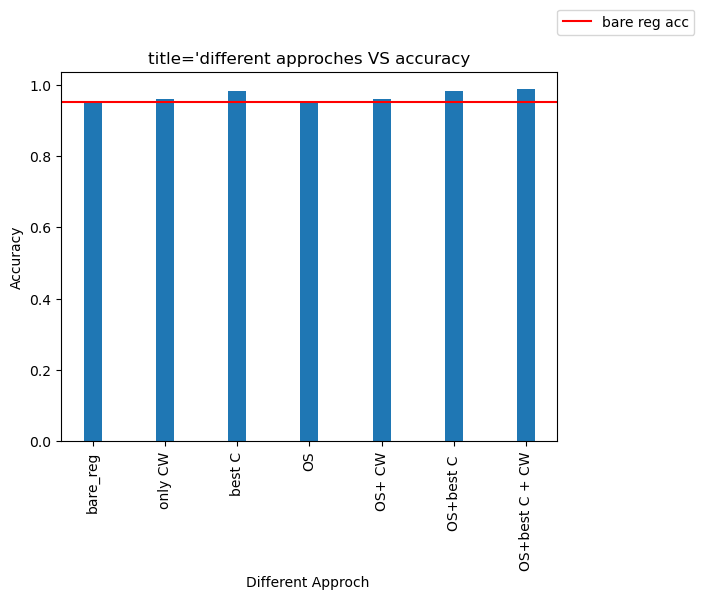

In [232]:
plt.bar(["bare_reg","only CW","best C","OS",
        "OS+ CW","OS+best C ","OS+best C + CW"],
        [bare_accuracy,only_weights_accuracy,only_C_accuracy,
        bare_oversampled_accuracy,oversampled_class_weights_accuracy,Oversampled_C_only_accuracy 
        ,best_oversampled_class_weights_accuracy ]
        ,width=0.25,)
plt.title("title='different approches VS accuracy")
plt.xticks(rotation='vertical')
plt.axhline(bare_accuracy, color='red',label='bare reg acc') 
plt.legend(loc=[1,1.1])
plt.xlabel('Different Approch ')
plt.ylabel('Accuracy')


plt.show()
